# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](http://yann.lecun.com/exdb/mnist/) and include:

88% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
95.3% [Lecun et al., 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf)
99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)

MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Imports

In [1]:
!pip install ipywidgets

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 134 kB 4.7 MB/s eta 0:00:01
     |████████████████████████████████| 2.0 MB 36.3 MB/s eta 0:00:01
     |████████████████████████████████| 384 kB 42.8 MB/s eta 0:00:01


In [1]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [2]:
# Define transforms
## YOUR CODE HERE ##
from torchvision import datasets

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,)) ])

# Create training set and define training dataloader
## YOUR CODE HERE ##
training_data = datasets.MNIST('data', download=True, train=True, transform=transform)

train_loader= torch.utils.data.DataLoader(training_data,
                                          batch_size=32,
                                          shuffle=True)

# Create test set and define test dataloader
## YOUR CODE HERE ##
test_data = datasets.MNIST('data', download=True, train=False, transform=transform)

test_loader= torch.utils.data.DataLoader(training_data,
                                          batch_size=32,
                                          shuffle=True)

/opt/conda/lib/python3.7/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:178.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

I onvert data to tensor,so it can be handled by Dataloader
I normalized the data so it wont dispute learning process 

**DOUBLE CLICK THIS CELL TO MODIFY**

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [3]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

In [27]:
# Explore data
## YOUR CODE HERE ##
dataiter = iter(test_loader)
    
batch = next(dataiter)
images = batch[0]
images.shape

torch.Size([32, 1, 28, 28])

In [28]:
labels = batch[1]
labels.shape

torch.Size([32])

In [29]:
l=labels.detach().numpy()
np.unique(l)

array([0, 1, 2, 3, 4, 6, 7, 8, 9])

5


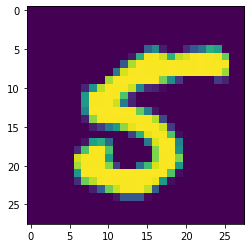

0


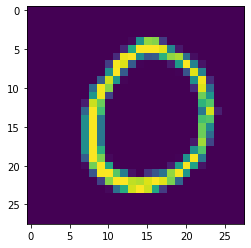

3


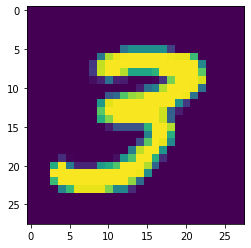

1


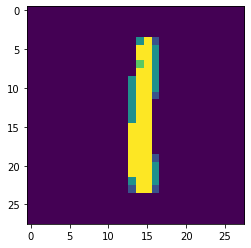

2


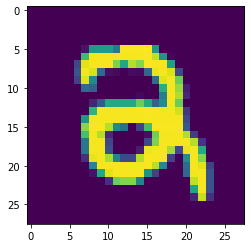

In [6]:
show5(train_loader)

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [15]:
## YOUR CODE HERE ##

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.activation =F.relu
        self.layer1 = nn.Linear(28*28, 256)
        self.layer2 = nn.Linear(256, 128)
        self.layer3 = nn.Linear(128, 84)
        self.layer4 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.activation(self.layer1(x))
        x = self.activation(self.layer2(x))
        x = self.activation(self.layer3(x))
        x = self.layer4(x)
        return x

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [16]:
## YOUR CODE HERE ##
net = Net()
optimizer =optim.Adam(net.parameters(), lr=0.001) 
criterion = nn.CrossEntropyLoss()

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [18]:
## YOUR CODE HERE ##
net.to('cuda')

num_epochs = 10
train_loss_history = list()
train_correct_history=list()

for epoch in range(num_epochs):
    net.train()
    train_loss = 0.0
    train_correct = 0
    for i, data in enumerate(train_loader):
        inputs, labels = data
        
        if torch.cuda.is_available():
            inputs, labels = inputs.cuda(), labels.cuda()
            
        optimizer.zero_grad()#training start!
        outputs =  net(inputs)
        loss =  criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        _, preds = torch.max(outputs.data, 1)#check result,preds are index of row(label)
        train_correct += (preds == labels).sum().item()#add all True
        train_loss += loss.item()#errors
    print(f'Epoch {epoch + 1} training accuracy: {train_correct/len(train_loader):.2f}% training loss: {train_loss/len(train_loader):.5f}')
    train_loss_history.append(train_loss/len(train_loader))
    train_correct_history.append(train_correct/len(train_loader))
    
    

Epoch 1 training accuracy: 28.65% training loss: 0.33002
Epoch 2 training accuracy: 30.46% training loss: 0.15797
Epoch 3 training accuracy: 30.79% training loss: 0.12187
Epoch 4 training accuracy: 30.99% training loss: 0.10315
Epoch 5 training accuracy: 31.15% training loss: 0.08631
Epoch 6 training accuracy: 31.21% training loss: 0.07721
Epoch 7 training accuracy: 31.29% training loss: 0.07006
Epoch 8 training accuracy: 31.35% training loss: 0.06352
Epoch 9 training accuracy: 31.40% training loss: 0.05898
Epoch 10 training accuracy: 31.48% training loss: 0.05060


Plot the training loss (and validation loss/accuracy, if recorded).

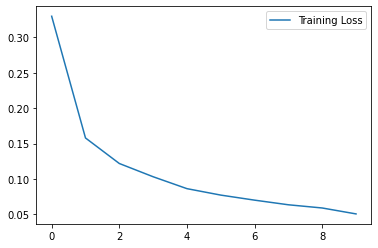

In [19]:
## YOUR CODE HERE ##
plt.plot(train_loss_history, label="Training Loss")
plt.legend()
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [20]:
## YOUR CODE HERE ##
val_loss = 0.0
val_correct = 0
for inputs, labels in test_loader:
    if torch.cuda.is_available():
        inputs, labels = inputs.cuda(), labels.cuda()
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    
    _, preds = torch.max(outputs.data, 1)
    val_correct += (preds == labels).sum().item()
    val_loss += loss.item()
print("accueacy is {}%".format(val_correct/len(test_loader)))

accueacy is 31.687466666666666%


## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [34]:
## YOUR CODE HERE ##
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.activation =F.relu
        self.layer1 = nn.Linear(28*28, 256)
        self.layer2 = nn.Linear(256, 128)
        self.layer3 = nn.Linear(128, 64)
        self.layer4 = nn.Linear(64, 10)
        
    def forward(self, x):
        x = torch.flatten(x, 1)
        x = self.activation(self.layer1(x))
        x = self.activation(self.layer2(x))
        x = self.activation(self.layer3(x))
        x = self.layer4(x)
        return x

In [35]:
net = Net()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
#optimizer =optim.Adam(net.parameters(), lr=0.0001) 
criterion = nn.CrossEntropyLoss()

In [36]:
net.to('cuda')

num_epochs = 20
train_loss_history = list()
train_correct_history=list()

for epoch in range(num_epochs):
    net.train()
    train_loss = 0.0
    train_correct = 0
    for i, data in enumerate(train_loader):
        inputs, labels = data
        
        if torch.cuda.is_available():
            inputs, labels = inputs.cuda(), labels.cuda()
            
        optimizer.zero_grad()#training start!
        outputs =  net(inputs)
        loss =  criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        _, preds = torch.max(outputs.data, 1)#check result,preds are index of row(label)
        train_correct += (preds == labels).sum().item()#add all True
        train_loss += loss.item()#errors
    print(f'Epoch {epoch + 1} training accuracy: {train_correct/len(train_loader):.2f}% training loss: {train_loss/len(train_loader):.5f}')
    train_loss_history.append(train_loss/len(train_loader))
    train_correct_history.append(train_correct/len(train_loader))

Epoch 1 training accuracy: 22.75% training loss: 0.98546
Epoch 2 training accuracy: 28.80% training loss: 0.33813
Epoch 3 training accuracy: 29.55% training loss: 0.26136
Epoch 4 training accuracy: 30.03% training loss: 0.20815
Epoch 5 training accuracy: 30.38% training loss: 0.16991
Epoch 6 training accuracy: 30.63% training loss: 0.14457
Epoch 7 training accuracy: 30.81% training loss: 0.12473
Epoch 8 training accuracy: 30.95% training loss: 0.10979
Epoch 9 training accuracy: 31.07% training loss: 0.09755
Epoch 10 training accuracy: 31.17% training loss: 0.08669
Epoch 11 training accuracy: 31.27% training loss: 0.07814
Epoch 12 training accuracy: 31.30% training loss: 0.07135
Epoch 13 training accuracy: 31.38% training loss: 0.06472
Epoch 14 training accuracy: 31.44% training loss: 0.05972
Epoch 15 training accuracy: 31.47% training loss: 0.05460
Epoch 16 training accuracy: 31.53% training loss: 0.05011
Epoch 17 training accuracy: 31.56% training loss: 0.04563
Epoch 18 training accur

In [ ]:
val_loss = 0.0
val_correct = 0
for inputs, labels in test_loader:
    if torch.cuda.is_available():
        inputs, labels = inputs.cuda(), labels.cuda()
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    
    _, preds = torch.max(outputs.data, 1)
    val_correct += (preds == labels).sum().item()
    val_loss += loss.item()
print("accueacy is {}%".format(val_correct/len(test_loader)))

## Saving your model
Using `torch.save`, save your model for future loading.

In [ ]:
## YOUR CODE HERE ##